In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Tout est prêt pour le projet ECG 🎉")


Tout est prêt pour le projet ECG 🎉


In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("ECG5000_TRAIN.txt")
print(data.shape)


(500, 141)


In [4]:
print("Nombre total d'exemples :", data.shape[0])
print("Longueur d’un signal ECG :", data.shape[1] - 1)


Nombre total d'exemples : 500
Longueur d’un signal ECG : 140


In [5]:
y = data[:, 0]      # labels
X = data[:, 1:]     # signaux ECG

print("X :", X.shape)
print("y :", y.shape)


X : (500, 140)
y : (500,)


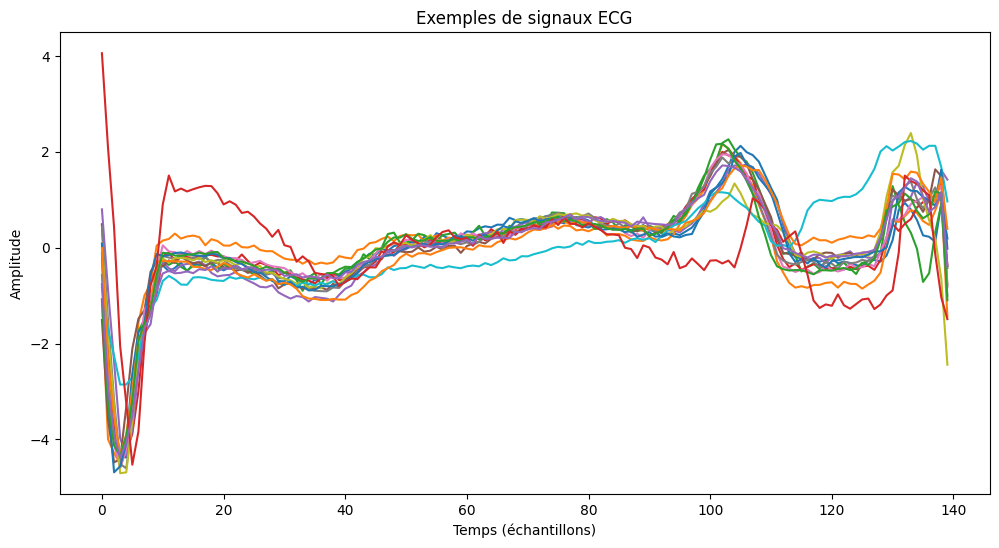

In [6]:
plt.figure(figsize=(12,6))

for i in range(15):   # tu peux changer 15 par 10 ou 20
    plt.plot(X[i])

plt.title("Exemples de signaux ECG")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.show()


In [7]:
import numpy as np

classes, counts = np.unique(y, return_counts=True)

for c, n in zip(classes, counts):
    print(f"Classe {int(c)} : {n} signaux")


Classe 1 : 292 signaux
Classe 2 : 177 signaux
Classe 3 : 10 signaux
Classe 4 : 19 signaux
Classe 5 : 2 signaux


In [8]:
from sklearn.model_selection import train_test_split

# séparation train / validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train :", X_train.shape)
print("Validation :", X_val.shape)


Train : (400, 140)
Validation : (100, 140)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [3]:
data = np.loadtxt("ECG5000_TRAIN.txt")

X = data[:, 1:]              # signaux ECG
y = data[:, 0].astype(int)   # labels


In [4]:
X = (X - np.mean(X)) / np.std(X)


In [5]:
y = y - 1  # labels commencent à 0
num_classes = len(np.unique(y))

y_cat = to_categorical(y, num_classes)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y_cat, test_size=0.2, random_state=42
)




In [8]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6325 - loss: 1.0314 - val_accuracy: 0.8900 - val_loss: 0.4892
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9350 - loss: 0.2891 - val_accuracy: 0.8900 - val_loss: 0.4789
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9425 - loss: 0.2327 - val_accuracy: 0.8900 - val_loss: 0.3879
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9475 - loss: 0.1892 - val_accuracy: 0.9000 - val_loss: 0.3283
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9500 - loss: 0.1573 - val_accuracy: 0.9000 - val_loss: 0.3146
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9575 - loss: 0.1444 - val_accuracy: 0.9100 - val_loss: 0.2978
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9650 - loss: 0.1303 - val_accuracy: 0.9000 - val_loss: 0.2923
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9675 - loss: 0.1174 - val_accuracy: 0.9100 - v

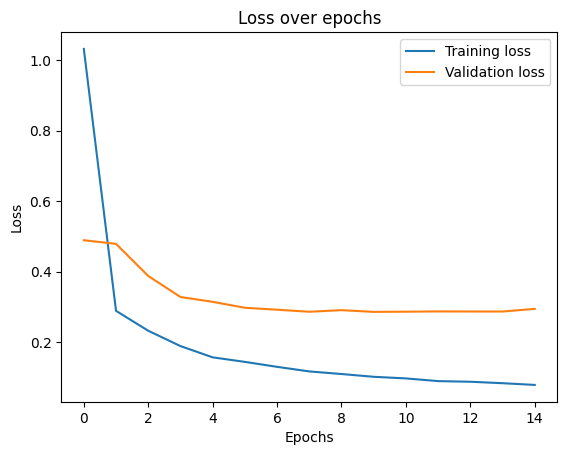

In [11]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()


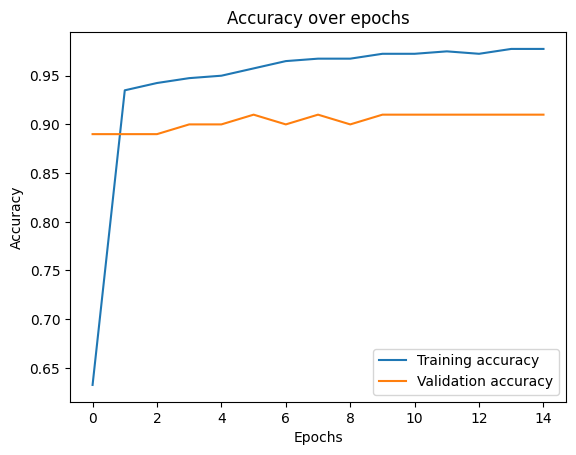

In [12]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()
